Loading the libraries

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk import pos_tag
from nltk.corpus import stopwords, wordnet
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
import enchant
from string import punctuation
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from collections import Counter
from sklearn.preprocessing import LabelBinarizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report,confusion_matrix, plot_confusion_matrix, accuracy_score
import tensorflow as tf
from tensorflow.keras.preprocessing import text, sequence
import gensim

Importing the dataset

In [19]:
true = pd.read_csv("Data/True.csv")
fake = pd.read_csv("Data/Fake.csv")

In [20]:
true

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [21]:
fake

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [22]:
true['label'] = 1
fake['label'] = 0

In [23]:
# Merging the dataset
df = pd.concat([true, fake])

In [24]:
# Reset index because of double indices we got from merging true and fake dfs
df.reset_index(drop=True, inplace = True)

In [25]:
df

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


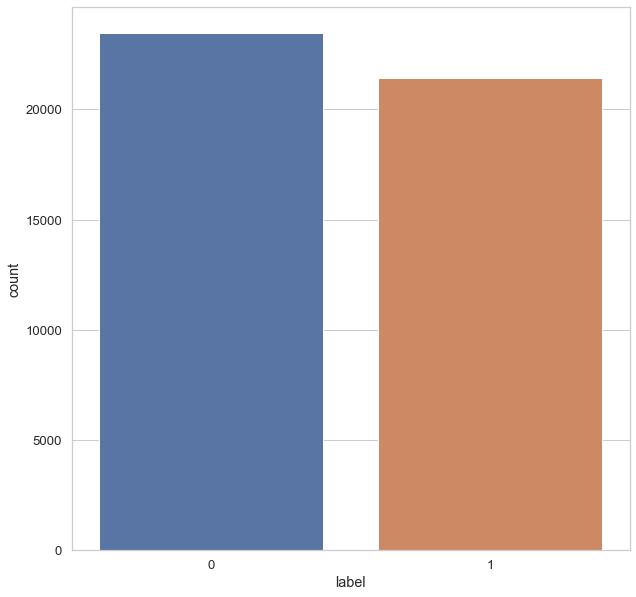

In [76]:
plt.figure(figsize=(10,10))
sns.countplot(x = "label", data=df)
plt.show()

In [27]:
# Do we have missing values?
df.isna().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [28]:
df.subject.value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

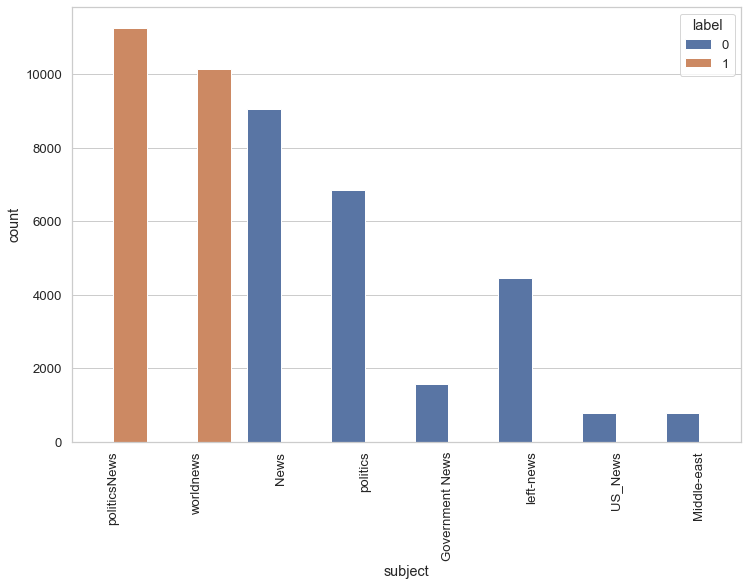

In [29]:
plt.figure(figsize = (12,8))
sns.set(style = "whitegrid",font_scale = 1.2)
chart = sns.countplot(x = "subject", hue = "label" , data = df)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
plt.show()

Real and fake news have completely different subjects. We will need to exclude this column from our analysis.

In [30]:
df['text'] = df['title'] + " " + df['text']
del df['title']
del df['subject']
del df['date']

Stopwords

In [32]:
# Run if no stopwords on the machine
# nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dejanbulaja/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [33]:
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

In [34]:
stop

{'!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'need

In [35]:
# Useful functions

def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

# Removing URL's
def remove_between_square_brackets(text):
    return re.sub(r'http\S+', '', text)

#Removing the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_stopwords(text)
    return text

In [36]:
# Apply those functions on our text
df['text'] = df['text'].apply(denoise_text)

In [37]:
df['text'].head()

0    U.S. budget fight looms, Republicans flip fisc...
1    U.S. military accept transgender recruits Mond...
2    Senior U.S. Republican senator: 'Let Mr. Muell...
3    FBI Russia probe helped Australian diplomat ti...
4    Trump wants Postal Service charge 'much more' ...
Name: text, dtype: object

Wordcloud for real text (label = 1)

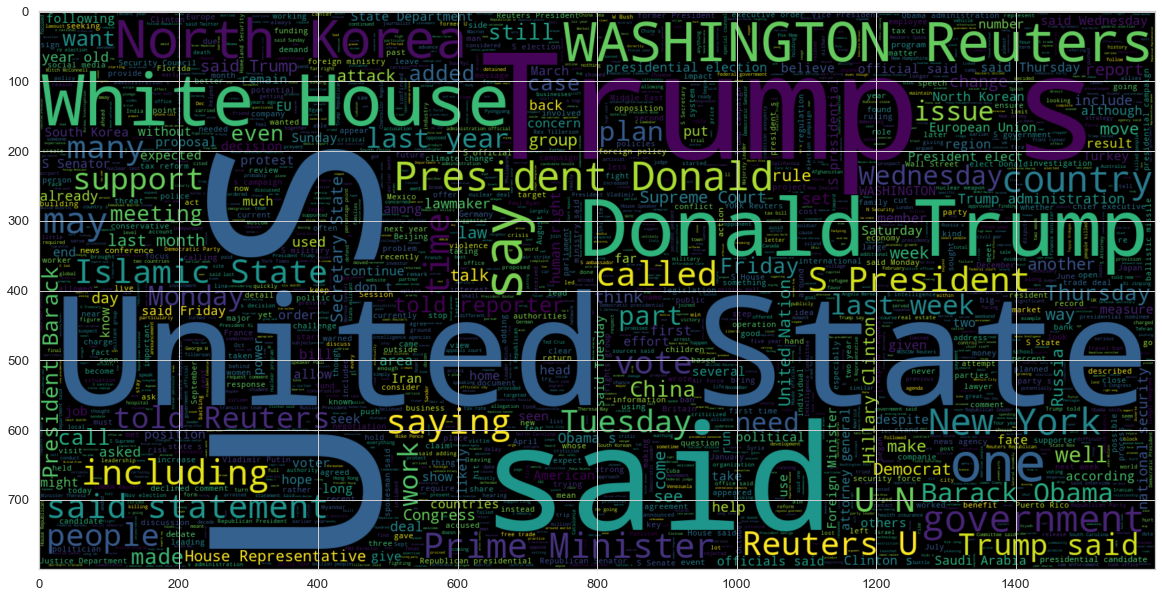

In [38]:
plt.figure(figsize = (20,20)) # Text that is not Fake
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(df[df.label == 1].text))
plt.imshow(wc , interpolation = 'bilinear')
plt.show()

Wordcloud for fake news (label = 0)

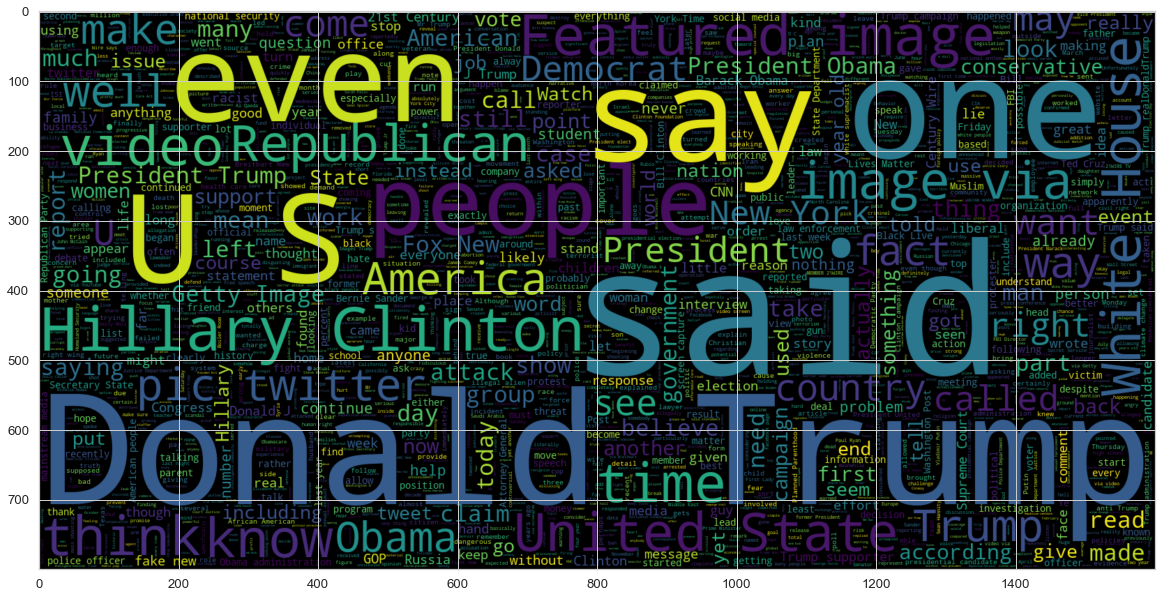

In [39]:
plt.figure(figsize = (20,20)) # Text that is Fake
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(df[df.label == 0].text))
plt.imshow(wc , interpolation = 'bilinear')
plt.show()

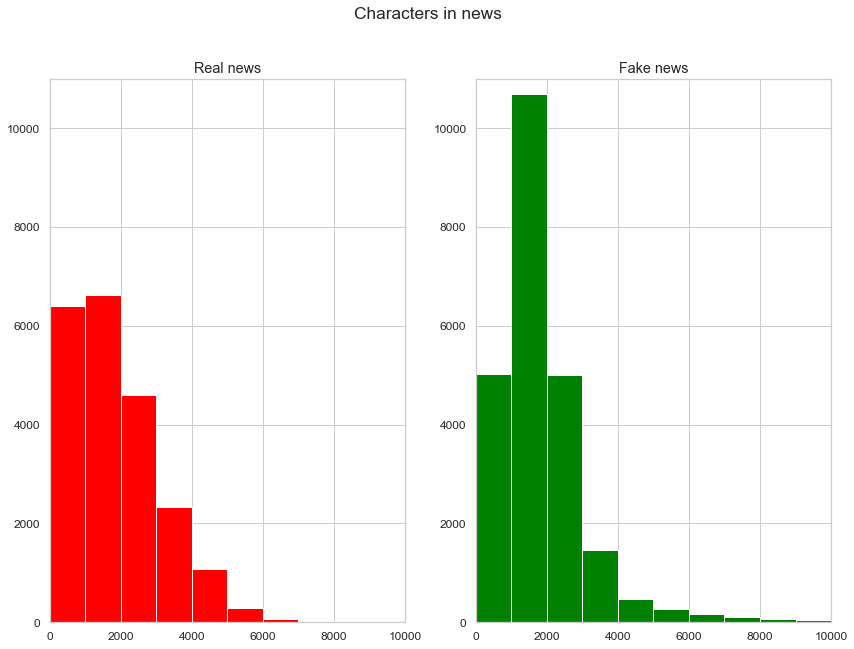

In [42]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(14,10))

# REAL NEWS
text_len=df[df['label']==1]['text'].str.len()

ax1.hist(text_len,color='red', bins = range(0, 11000, 1000))
ax1.set_title('Real news')
ax1.set_xticks(range(0, 11000, 2000))
ax1.set_xticklabels(range(0, 11000, 2000), fontsize = 12)
ax1.set_xlim([0, 10000])
ax1.set_yticks(range(0, 11000, 2000)) 
ax1.set_yticklabels(range(0, 11000, 2000), fontsize = 12)
ax1.set_ylim([0, 11000])

# FAKE NEWS
text_len=df[df['label']==0]['text'].str.len()

ax2.hist(text_len,color='green', bins = range(0, 11000, 1000))
ax2.set_title('Fake news')
ax2.set_xticks(range(0, 11000, 2000))
ax2.set_xticklabels(range(0, 11000, 2000), fontsize = 12)
ax2.set_xlim([0, 10000])
ax2.set_yticks(range(0, 11000, 2000)) 
ax2.set_yticklabels(range(0, 11000, 2000), fontsize = 12)
ax2.set_ylim([0, 11000])

fig.suptitle('Characters in news')
plt.show()

It appears that fake news might be longer than real ones. Interesting..

Let's check number of words in each text

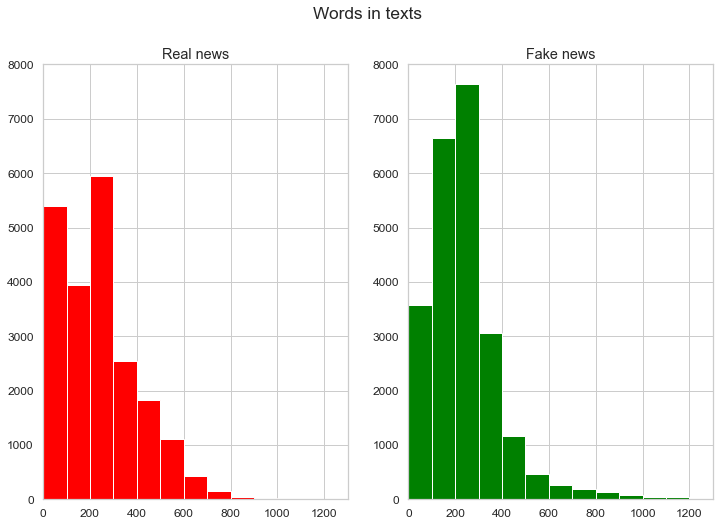

In [43]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))

# REAL NEWS
text_len=df[df['label']==1]['text'].str.split().map(lambda x: len(x))
ax1.hist(text_len,color='red', bins = range(0, 1300, 100))
ax1.set_title('Real news')
ax1.set_xticks(range(0, 1400, 200)) 
ax1.set_xticklabels(range(0, 1400, 200), fontsize = 12)
ax1.set_xlim([0, 1300])
ax1.set_yticks(range(0, 9000, 1000)) 
ax1.set_yticklabels(range(0, 9000, 1000), fontsize = 12)
ax1.set_ylim([0, 8000])

# FAKE NEWS
text_len=df[df['label']==0]['text'].str.split().map(lambda x: len(x))
ax2.hist(text_len,color='green', bins = range(0, 1300, 100))
ax2.set_title('Fake news')
ax2.set_xticks(range(0, 1400, 200)) 
ax2.set_xticklabels(range(0, 1400, 200), fontsize = 12)
ax2.set_xlim([0, 1300])
ax2.set_yticks(range(0, 9000, 1000)) 
ax2.set_yticklabels(range(0, 9000, 1000), fontsize = 12)
ax2.set_ylim([0, 8000])

fig.suptitle('Words in texts')
plt.show()

Once again, it appears that fake news have more words. Is it because of slang?

Let's check that

In [44]:
# Function to get all words
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words

In [48]:
real_text = df[df['label']==1]['text']
real_corpus = get_corpus(real_text)

real_corpus = [word.strip('.,!;()[]”“') for word in real_corpus]
real_corpus = [word.replace("'s", '') for word in real_corpus]
real_corpus = set(real_corpus)

d = enchant.Dict("en_US")
d.add("U.S")

real_in_dict = 0
real_not_in_dict = 0

for word in real_corpus:
    if len(word) == 0:
        continue

    if (d.check(word)) == True:
        real_in_dict += 1
    else:
        real_not_in_dict +=1
        
print("In dict:", real_in_dict)
print("Not in dict:", real_not_in_dict)

In dict: 48141
Not in dict: 62434


In [49]:
fake_text = df[df['label']==0]['text']
fake_corpus = get_corpus(fake_text)

fake_corpus = [word.strip('.,!;()[]”“') for word in fake_corpus]
fake_corpus = [word.replace("'s",'') for word in fake_corpus]
fake_corpus = set(fake_corpus)

d = enchant.Dict("en_US")
d.add("U.S")

fake_in_dict = 0
fake_not_in_dict = 0

for word in fake_corpus:
    if len(word) == 0:
        continue

    if (d.check(word)) == True:
        fake_in_dict += 1
    else:
        fake_not_in_dict +=1
        
print("In dict:", fake_in_dict)
print("Not in dict:", fake_not_in_dict)

In dict: 63280
Not in dict: 180507


In [122]:
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.append_trace(go.Pie(values=[real_not_in_dict, real_in_dict], 
                        labels=['Do not exist', 'Exist'], hole=.6, 
                        title='Real News'), row=1, col=1)

fig.append_trace(go.Pie(values=[fake_not_in_dict, fake_in_dict], 
                        labels=['Do not exist', 'Exist'], hole=.6, 
                        title='Fake News'), row=1, col=2)

fig.update_layout( title = {
        'text': "% of words in English dictionary",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    })

fig.show()

In [57]:
# Get word corpus
corpus = get_corpus(df.text)

# Most common words across all news
counter = Counter(corpus)
most_common = counter.most_common(20)
most_common

[('Trump', 111503),
 ('said', 93162),
 ('would', 54613),
 ('U.S.', 50441),
 ('President', 33180),
 ('people', 33115),
 ('also', 30325),
 ('one', 29370),
 ('Donald', 27795),
 ('said.', 26194),
 ('Republican', 23921),
 ('could', 23637),
 ('told', 23213),
 ('Obama', 23201),
 ('House', 23188),
 ('United', 22861),
 ('Clinton', 22471),
 ('government', 21826),
 ('(Reuters)', 21247),
 ('like', 20535)]

In [58]:
# Get word corpus
real_corpus = get_corpus(df[df['label']==1]['text'])
# Most common words across real news
counter = Counter(real_corpus)
most_common = counter.most_common(20)
most_common

[('said', 72039),
 ('U.S.', 42143),
 ('Trump', 40861),
 ('would', 31560),
 ('said.', 21582),
 ('(Reuters)', 21239),
 ('President', 17206),
 ('also', 15714),
 ('Republican', 15111),
 ('United', 15071),
 ('government', 15049),
 ('House', 14982),
 ('told', 14259),
 ('could', 13801),
 ('people', 11789),
 ('last', 11633),
 ('Trump’s', 11589),
 ('two', 10463),
 ('Donald', 10320),
 ('one', 10317)]

In [59]:
# Get word corpus
fake_corpus = get_corpus(df[df['label']==0]['text'])
# Most common words across fake news
counter = Counter(fake_corpus)
most_common = counter.most_common(20)
most_common

[('Trump', 70642),
 ('would', 23053),
 ('people', 21326),
 ('said', 21123),
 ('one', 19053),
 ('Donald', 17475),
 ('Obama', 17018),
 ('like', 16362),
 ('Clinton', 16146),
 ('President', 15974),
 ('also', 14611),
 ('Hillary', 13611),
 ('even', 12391),
 ('get', 10249),
 ('could', 9836),
 ('American', 9776),
 ('going', 9526),
 ('time', 9211),
 ('via', 9052),
 ('told', 8954)]

In [98]:
def count_twitters_user(df):
    twitter_username_re = re.compile(r'@([A-Za-z0-9_]+)')
    count = 0
    list_ = []
    for text in df['text']:
        count += len(re.findall(twitter_username_re, text))
    return count

In [120]:
twitter_users_fake_count = count_twitters_user(fake)
twitter_users_true_count = count_twitters_user(true)

fig = go.Figure()
fig.add_trace(go.Bar(x=['Fake', 'True'],
    y=[twitter_users_fake_count, twitter_users_true_count],
    name='Twitter user name Pattern',
    marker_color='rgb(68, 143, 39)')
)
fig.update_layout({
        'plot_bgcolor': 'rgba(0, 0, 0, 0)',
        'paper_bgcolor': 'rgba(0, 0, 0, 0)'})

fig.update_layout( title = {
        'text': "Unique Twitter username mentions in news",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    })

fig.update_xaxes(showline=True, linewidth=1, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=1, linecolor='black', mirror=True)

fig.show()

Word2Vec

In [60]:
X = df.text
y = df.label

In [61]:
X

0        U.S. budget fight looms, Republicans flip fisc...
1        U.S. military accept transgender recruits Mond...
2        Senior U.S. Republican senator: 'Let Mr. Muell...
3        FBI Russia probe helped Australian diplomat ti...
4        Trump wants Postal Service charge 'much more' ...
                               ...                        
44893    McPain: John McCain Furious Iran Treated US Sa...
44894    JUSTICE? Yahoo Settles E-mail Privacy Class-ac...
44895    Sunnistan: US Allied ‘Safe Zone’ Plan Take Ter...
44896    Blow $700 Million: Al Jazeera America Finally ...
44897    10 U.S. Navy Sailors Held Iranian Military – S...
Name: text, Length: 44898, dtype: object

In [149]:
new_X = []
for sentence in X:
    new_X.append(sentence.split())

In [163]:
new_X[1]

['U.S.',
 'military',
 'accept',
 'transgender',
 'recruits',
 'Monday:',
 'Pentagon',
 'WASHINGTON',
 '(Reuters)',
 'Transgender',
 'people',
 'allowed',
 'first',
 'time',
 'enlist',
 'U.S.',
 'military',
 'starting',
 'Monday',
 'ordered',
 'federal',
 'courts,',
 'Pentagon',
 'said',
 'Friday,',
 'President',
 'Donald',
 'Trump’s',
 'administration',
 'decided',
 'appeal',
 'rulings',
 'blocked',
 'transgender',
 'ban.',
 'Two',
 'federal',
 'appeals',
 'courts,',
 'one',
 'Washington',
 'one',
 'Virginia,',
 'last',
 'week',
 'rejected',
 'administration’s',
 'request',
 'put',
 'hold',
 'orders',
 'lower',
 'court',
 'judges',
 'requiring',
 'military',
 'begin',
 'accepting',
 'transgender',
 'recruits',
 'Jan.',
 '1.',
 'Justice',
 'Department',
 'official',
 'said',
 'administration',
 'challenge',
 'rulings.',
 '“The',
 'Department',
 'Defense',
 'announced',
 'releasing',
 'independent',
 'study',
 'issues',
 'coming',
 'weeks.',
 'rather',
 'litigate',
 'interim',
 'appeal'

In [151]:
# Dimension of vectors we are generating
EMBEDDING_DIM = 100

#Creating Word Vectors by Word2Vec Method 
w2v_model = gensim.models.Word2Vec(sentences=new_X, vector_size=EMBEDDING_DIM, workers = 4)

In [152]:
# Vocab shape
w2v_model.wv.vectors.shape

(93820, 100)

In [154]:
# Sample vector for word Trump
w2v_model.wv["Trump"]

array([-2.4423897 , -1.2012811 ,  1.2575924 ,  0.39789057, -1.4622517 ,
        0.92679244,  1.9761254 ,  0.098097  , -0.0720627 ,  0.08910653,
        1.5660275 ,  1.1397614 , -0.09427242, -0.86521655, -3.1509156 ,
        0.4624462 , -1.9848846 ,  1.5111531 , -1.3723787 ,  0.40822437,
       -1.6676621 ,  2.294724  ,  3.1907177 , -2.2318037 , -0.72439504,
        0.8070016 ,  2.473053  ,  2.10224   , -1.40348   , -1.0065733 ,
        0.18654789,  0.08843002,  1.3562784 ,  1.2541201 , -0.03532786,
        1.1390486 ,  1.3063166 ,  0.0343734 , -3.9830444 , -1.2153455 ,
       -0.5560895 ,  3.0171497 , -0.8725151 , -2.093142  , -1.5412297 ,
        0.38824686,  0.68268096,  0.27535155,  0.19391875, -0.37977713,
       -0.64031863,  2.4051025 ,  0.940258  ,  0.8735999 ,  2.9386005 ,
       -2.4054961 ,  1.7262734 ,  0.07509752, -1.170096  ,  2.9582767 ,
        1.6724663 , -1.1519889 , -2.2854872 ,  1.8482984 , -1.906939  ,
       -1.8251611 ,  0.8525339 ,  1.9181565 , -0.13299295, -0.54

In [157]:
# Most similar words to Serbia
w2v_model.wv.most_similar("Serbia")

[('Serbia,', 0.8120061755180359),
 ('Kosovo', 0.7757359147071838),
 ('Bosnia', 0.7390854954719543),
 ('Cyprus', 0.7133884429931641),
 ('Colombia', 0.7091169357299805),
 ('Kosovo,', 0.704657793045044),
 ('1991', 0.6929665803909302),
 ('Egypt', 0.6850703358650208),
 ('Serb', 0.6848708987236023),
 ('Ukraine’s', 0.6807130575180054)]

In [159]:
# Most similar words to Hitler
w2v_model.wv.most_similar("Hitler")

[('Adolf', 0.8673751354217529),
 ('Hitler,', 0.8422415256500244),
 ('Hitler.', 0.8138993382453918),
 ('Nazis', 0.7576054334640503),
 ('Mussolini', 0.7522037029266357),
 ('Nazi', 0.7501599788665771),
 ('Benito', 0.7307780385017395),
 ('fascist', 0.6611672043800354),
 ('dictator', 0.6215783357620239),
 ('1930s', 0.6109036803245544)]

Logistic Regression

In [69]:
X_train, X_test, y_train, y_test = train_test_split(df.text, df.label, test_size = 0.2,random_state=3)

vec_train = CountVectorizer().fit(X_train)
X_vec_train = vec_train.transform(X_train)
X_vec_test = vec_train.transform(X_test)

model = LogisticRegression(max_iter=10000)
model.fit(X_vec_train, y_train)
predicted_value = model.predict(X_vec_test)
accuracy_value = roc_auc_score(y_test, predicted_value)
print(accuracy_value)

0.997235964313529


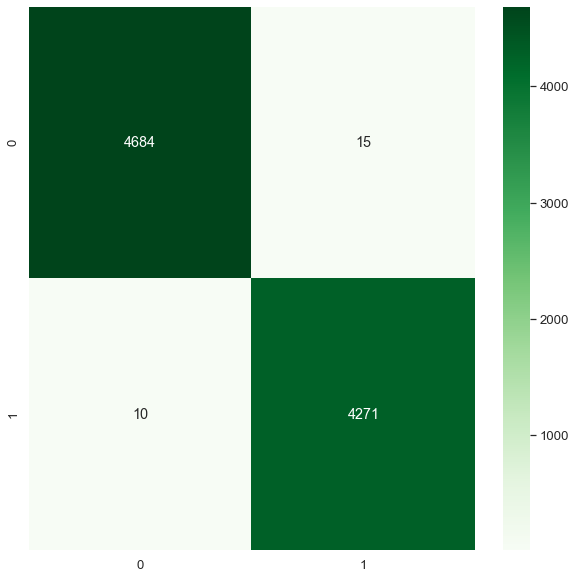

In [70]:
prediction = []
for i in range(len(predicted_value)):
    if predicted_value[i].item() > 0.5:
        prediction.append(1)
    else:
        prediction.append(0)
        
cm = confusion_matrix(y_test, prediction)
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True,fmt='g',cmap='Greens')
plt.show()

In [80]:
cm = confusion_matrix(y_test, prediction)
print('Confusion matrix\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix
 [[4684   15]
 [  10 4271]]

True Positives(TP) =  4684

True Negatives(TN) =  4271

False Positives(FP) =  15

False Negatives(FN) =  10
